<h2> Data </h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create dataFrame from out data file (csv)
df = pd.read_csv("./nfl-scores-and-betting-data/spreadspoke_scores.csv")
# Drop columns with information we don't need
df = df.drop(columns=["schedule_season", "schedule_week", "schedule_playoff", "stadium_neutral", "team_favorite_id", "spread_favorite", "over_under_line"],axis=1)
# Drop games where stadium was closed
df = df[df.weather_detail != "DOME"]

# Indicate whether home team lost or won.
# BUGGY using elif for considering TIES, for now TIES are LOSSES
for index, row in df.iterrows():
    score_home = df.loc[index]['score_home']
    score_away = df.loc[index]['score_away']
    if score_home > score_away:
        df.at[index, 'home_w_l_t'] = 'WIN'
    elif score_away > score_home:
         df.at[index, 'home_w_l_t'] = 'LOSS'
    else:
        df.at[index, 'home_w_l_t'] = 'TIE'

# Print out dataFrame
df

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [3]:
# lets see what would happen if we drop the rows with null values
rows_to_drop = df[df.isnull().any(axis=1)]
rows_to_drop

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [4]:
# lmao I guess we cant drop them then. 
# It would appear that most entries are missing weather_detail column some are missing weather_humidity
# now lets check how many entries are missing weather_humidity
df.dropna(subset=["weather_humidity"], inplace = True)
df

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [5]:
# here we can see we still have 8388 entries left, so let's keep this newly modified dataframe
# due to the massive missing data in weather_detail, it is better to analyze our data to check 
# if there exists an relation between temperature/wind speed and the game outcome

In [6]:
# here I'll gather the temperature and wind speed data separately
# 3 temp data for: WIN, TIE, LOSS, 3 wind data for: WIN, TIE, LOSS
temp_win = []
temp_tie = []
temp_loss = []
wind_win = []
wind_tie = []
wind_loss = []

for index, row in df.iterrows():
    if row["home_w_l_t"] == "WIN":
        temp_win.append(row["weather_temperature"])
        wind_win.append(row["weather_wind_mph"])
    elif row["home_w_l_t"] == "TIE":
        temp_tie.append(row["weather_temperature"])
        wind_tie.append(row["weather_wind_mph"])
    else:
        temp_loss.append(row["weather_temperature"])
        wind_loss.append(row["weather_wind_mph"])

In [7]:
temp_win

[81.0,
 70.0,
 64.0,
 77.0,
 69.0,
 67.0,
 72.0,
 72.0,
 61.0,
 72.0,
 68.0,
 61.0,
 62.0,
 63.0,
 56.0,
 51.0,
 76.0,
 56.0,
 46.0,
 55.0,
 70.0,
 63.0,
 49.0,
 71.0,
 48.0,
 58.0,
 67.0,
 74.0,
 64.0,
 64.0,
 59.0,
 64.0,
 36.0,
 64.0,
 56.0,
 58.0,
 48.0,
 51.0,
 46.0,
 60.0,
 58.0,
 41.0,
 64.0,
 39.0,
 53.0,
 47.0,
 46.0,
 35.0,
 54.0,
 46.0,
 38.0,
 62.0,
 39.0,
 32.0,
 32.0,
 32.0,
 63.0,
 71.0,
 49.0,
 50.0,
 42.0,
 21.0,
 21.0,
 18.0,
 43.0,
 20.0,
 57.0,
 20.0,
 41.0,
 53.0,
 52.0,
 35.0,
 54.0,
 70.0,
 69.0,
 71.0,
 70.0,
 77.0,
 55.0,
 49.0,
 62.0,
 56.0,
 53.0,
 58.0,
 68.0,
 56.0,
 50.0,
 55.0,
 54.0,
 58.0,
 59.0,
 72.0,
 44.0,
 40.0,
 61.0,
 59.0,
 49.0,
 46.0,
 46.0,
 39.0,
 46.0,
 46.0,
 26.0,
 50.0,
 51.0,
 49.0,
 68.0,
 60.0,
 45.0,
 33.0,
 32.0,
 43.0,
 44.0,
 57.0,
 46.0,
 72.0,
 48.0,
 37.0,
 39.0,
 56.0,
 34.0,
 55.0,
 40.0,
 44.0,
 44.0,
 29.0,
 52.0,
 38.0,
 37.0,
 13.0,
 44.0,
 -2.0,
 60.0,
 73.0,
 67.0,
 70.0,
 67.0,
 79.0,
 70.0,
 67.0,
 77.0,
 62.0,
 62.0,

In [8]:
temp_loss

[83.0,
 82.0,
 71.0,
 63.0,
 65.0,
 62.0,
 59.0,
 60.0,
 65.0,
 55.0,
 53.0,
 66.0,
 64.0,
 53.0,
 53.0,
 50.0,
 52.0,
 50.0,
 62.0,
 66.0,
 43.0,
 51.0,
 59.0,
 58.0,
 37.0,
 64.0,
 43.0,
 44.0,
 31.0,
 48.0,
 58.0,
 30.0,
 40.0,
 36.0,
 30.0,
 58.0,
 55.0,
 44.0,
 33.0,
 20.0,
 58.0,
 30.0,
 28.0,
 54.0,
 39.0,
 47.0,
 58.0,
 50.0,
 46.0,
 44.0,
 40.0,
 68.0,
 67.0,
 75.0,
 72.0,
 72.0,
 54.0,
 54.0,
 71.0,
 65.0,
 61.0,
 61.0,
 61.0,
 60.0,
 72.0,
 44.0,
 57.0,
 56.0,
 58.0,
 54.0,
 52.0,
 54.0,
 43.0,
 42.0,
 66.0,
 58.0,
 43.0,
 60.0,
 32.0,
 31.0,
 59.0,
 38.0,
 60.0,
 50.0,
 65.0,
 46.0,
 41.0,
 55.0,
 33.0,
 39.0,
 41.0,
 55.0,
 34.0,
 25.0,
 53.0,
 41.0,
 61.0,
 36.0,
 42.0,
 43.0,
 46.0,
 30.0,
 36.0,
 71.0,
 78.0,
 64.0,
 69.0,
 71.0,
 68.0,
 70.0,
 51.0,
 52.0,
 54.0,
 73.0,
 61.0,
 53.0,
 57.0,
 53.0,
 67.0,
 58.0,
 62.0,
 58.0,
 64.0,
 45.0,
 63.0,
 62.0,
 50.0,
 46.0,
 46.0,
 55.0,
 62.0,
 36.0,
 65.0,
 58.0,
 55.0,
 56.0,
 39.0,
 50.0,
 33.0,
 40.0,
 42.0,
 42.0,
 47.0,

In [9]:
temp_tie

[64.0,
 60.0,
 53.0,
 44.0,
 38.0,
 34.0,
 69.0,
 67.0,
 55.0,
 63.0,
 54.0,
 42.0,
 55.0,
 36.0,
 37.0,
 49.0,
 34.0,
 55.0,
 50.0,
 61.0,
 46.0,
 46.0,
 52.0,
 34.0,
 80.0,
 57.0,
 63.0,
 40.0,
 62.0,
 54.0,
 53.0,
 42.0,
 23.0,
 34.0,
 64.0,
 52.0,
 41.0,
 61.0,
 47.0,
 40.0,
 65.0,
 61.0,
 58.0,
 51.0,
 32.0,
 50.0,
 72.0,
 58.0,
 58.0,
 54.0,
 44.0,
 56.0,
 57.0,
 67.0,
 27.0,
 73.0,
 82.0,
 29.0,
 53.0,
 56.0,
 37.0,
 55.0,
 70.0,
 30.0,
 38.0,
 49.0,
 59.0,
 37.0,
 60.0,
 20.0]

(array([  13.,   35.,  109.,  336.,  699.,  967., 1143.,  973.,  503.,
          84.]),
 array([-5. ,  4.7, 14.4, 24.1, 33.8, 43.5, 53.2, 62.9, 72.6, 82.3, 92. ]),
 <a list of 10 Patch objects>)

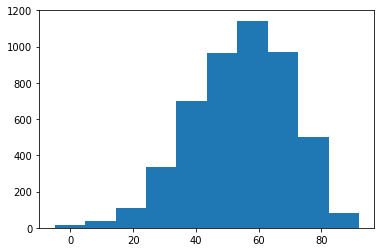

In [10]:
# here I will graph the histogram for the temperatures
# temp_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_temperature"])

(array([ 2.,  4., 10.,  7.,  7., 17., 12.,  6.,  3.,  2.]),
 array([20. , 26.2, 32.4, 38.6, 44.8, 51. , 57.2, 63.4, 69.6, 75.8, 82. ]),
 <a list of 10 Patch objects>)

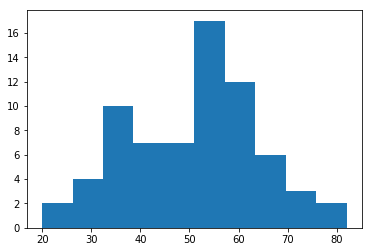

In [11]:
# temp_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_temperature"])

(array([  7.,  24., 101., 287., 559., 758., 817., 581., 288.,  34.]),
 array([-2. ,  7.7, 17.4, 27.1, 36.8, 46.5, 56.2, 65.9, 75.6, 85.3, 95. ]),
 <a list of 10 Patch objects>)

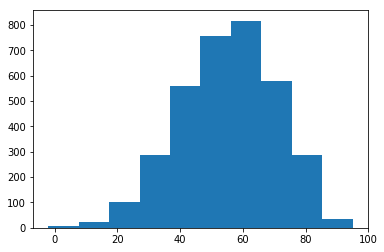

In [13]:
# temp_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_temperature"])

(array([ 143.,  722., 1438., 1283.,  681.,  371.,  144.,   56.,   22.,
           2.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

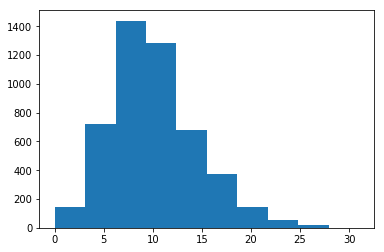

In [14]:
# histograms for wind_speeds
# wind_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_wind_mph"])

(array([ 9.,  8., 19., 15., 10.,  4.,  3.,  0.,  1.,  1.]),
 array([ 4. ,  6.1,  8.2, 10.3, 12.4, 14.5, 16.6, 18.7, 20.8, 22.9, 25. ]),
 <a list of 10 Patch objects>)

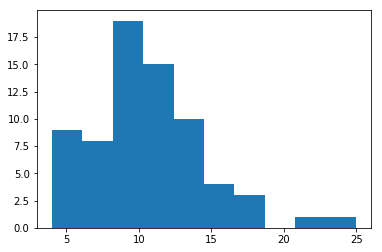

In [15]:
# wind_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_wind_mph"])

(array([ 128.,  522., 1033.,  896.,  498.,  263.,   81.,   22.,    8.,
           5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

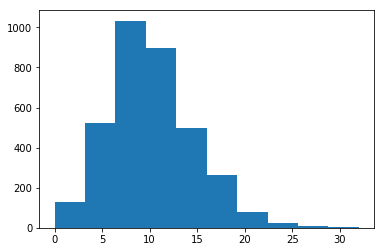

In [16]:
# wind_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_wind_mph"])